<h1 align="center"> Лабораторная работа №2 </h1>

---

<h1 align="center"> Университет ИТМО </h1>
<h2 align="center"> Факультет систем управления и робототехники </h2>

---

### Выполнили:
- **Соколов Никита**  
- **Минеев Кирилл**
- **Соловьев Дмитрий**
- **Семёнов Евгений**

---

### Проверил:
- **Догадин Егор Витальевич**

---

### 23 сентября 2024 г.

---

# Подготовка.

### Установка необходимых библиотек:

In [170]:
!pip install numpy matplotlib sympy


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [171]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import random

### Придумаем четыре целых числа a, b, c, d таким образом, чтобы все они были различными и ни одно из них не равнялось 0 или ±1.

In [172]:
a = random.randint(1, 6)
b = random.randint(a + 1, 11)
c = random.randint(b + 1, 16)
d = random.randint(c + 1, 21)


print(a, b, c, d, sep = "\t")

6	9	13	17


### Исходные значения x и y:

In [173]:
x_old = np.linspace(-5, 5, 11)
y_old = np.linspace(-4, 4, 9)
xy_old = np.column_stack([[x, y] for x in x_old for y in y_old])

### Функции для визуализации линейных отображений: 

In [174]:
colors = list(map(lambda x, y: (min(1, 1-y/4), min(1, 1+y/4), 1/5 + x/25), xy_old[0], xy_old[1]))

def plot_grid(xy_grid):
    plt.figure(figsize=(6, 6), facecolor="w")
    plt.scatter(xy_grid[0], xy_grid[1], s = 50, c = colors)
    plt.axis('equal')
    plt.grid(True)
    
    plt.gca().set_xticks(np.arange(min(xy_grid[0]), max(xy_grid[0]) + 1, 1))
    plt.gca().set_yticks(np.arange(min(xy_grid[1]), max(xy_grid[1]) + 1, 1))

### Исходная сетка значений:

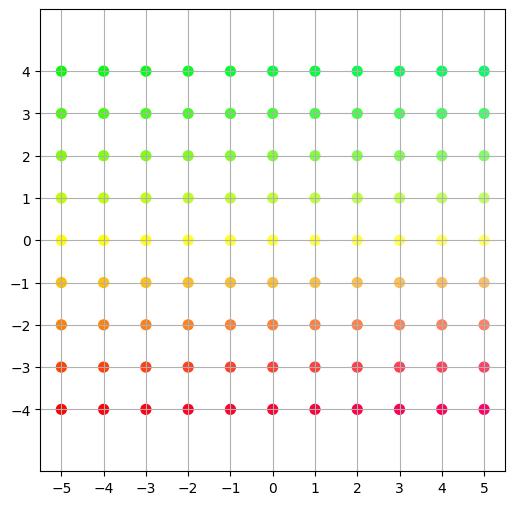

In [175]:
plot_grid(xy_old)

# Задание 1.

### Отражение (симметрия) плоскости относительно прямой y = ax.